In [2]:
#학습용, 검증용 분리
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
#케라스에서 처리할 수 있는 형태로 변환(샘플개수x가로x세로x차원)
train_images=train_images.reshape((60000, 28, 28, 1))
train_images=train_images.astype("float32") / 255
test_images=test_images.reshape((10000, 28, 28, 1))
test_images=test_images.astype("float32") / 255

In [4]:
#원핫인코딩
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
#모델 생성
from keras import layers, models
model = models.Sequential()
# 입력데이터(28x28x1), convolution layer(필터개수: 32, 필터크기: 3x3)
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# 맥스풀링 필터사이즈(2x2)
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# fully connected layer로 변환(완전연결층)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# 출력층 10개의 숫자로 분류
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
#모델 학습
hist = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 6ms/step - loss: 0.1344 - accuracy: 0.9579
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434 - accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0311 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0245 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0212 - accuracy: 0.9938


In [7]:
#검증용 데이터로 모델의 성능 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9908


(0.027004044502973557, 0.9908000230789185)

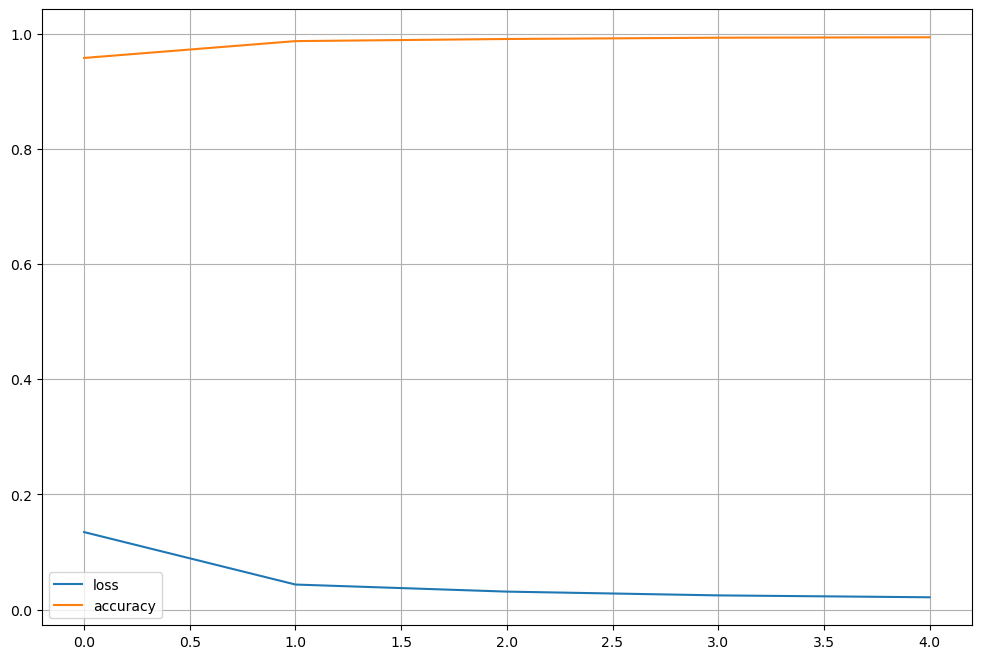

In [8]:
#모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [9]:
#모델 저장
model.save('c:/data/mnist/mnist.h5')